<a href="https://colab.research.google.com/github/luisam19/course_optimizacion/blob/main/1_Ejemplo_corte_Pyomo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo problema de corte en Pyomo

Este cuaderno ejemplifica la implementación de modelos de corte de materia prima  haciendo uso de Pyomo (Hart et al, 2011). Además a traves de este ejemplo se ilustrará el acceso a datos en hojas de cálculo y la implementación de modelos concretos en Pyomo en cotraposición a los modelos abstractos que se han presentado en otros ejemplos. Para la implementación de este mismo modelo de optimización en XpressMP usando MOSEL y en el Solver de Excel, te invitamos a revisar el material de la [segunda unidad de aprendizaje](https://udearroba.udea.edu.co/internos/course/view.php?id=10282&section=2#info1)







# Problema de programación de corte

Conocido en inglés como *Cutting Stock Problem*, este problema clásico de la optimización tiene como objetivo determinar cómo cortar unas piezas grandes de tamaño estándar (láminas, rollos, varillas, etc) en piezas más pequeñas para cumplir con unos pedidos dados de las piezas más pequeñas, de tal manera que se minimice la cantidad de desechos o equivalentemente el número de piezas cortadas. En este [link](https://https://neos-guide.org/content/cutting-stock-problem) tenemos la descripción que nos ofrece NEOS del problema. Ahora veamos un ejemplo práctico y su implementación computacional.

# Un ejemplo:

Liliana, la coordinadora de la planta de producción de Muebles El Comején está planeando la producción de la próxima semana. Con base en la demanda de los muebles, sabe que necesita la siguiente cantidad de piezas:

|   Pieza| Requerimiento |
|-------|----|
| **A** | 13 |
| **B** | 7  |
| **C** | 14	|
| **D** | 3 |
| **E** | 35	|
| **F** | 2 |
| **G** | 17  |

En conjunto con Eduardo, el operario de la máquina de corte, y con base en las dimensiones de las láminas de madera que utilizan y las dimensiones de las piezas a cortar,  Liliana ha ideado 10 patrones de corte diferentes (de los múltiples posibles). El número de piezas obtenidas por cada patrón y los patrones correspondientes se presentan a continuación:


| Pieza/Patron de corte |1|2|3	|4	|5	|6	|7	|8|	9|	10|
|---- |----|---|---	|---|---	|---	|---	|---|---|---|
|A|	1|1|8|0|0|1|2|3|0|1|
|B|	5|0|0|0|0|0|0|2|1|1|
|C|	0|1|0|0|0|1|3|0|0|1|
|D|	1|1|0|0|1|2|0|0|0|1|
|E|	0|0|1|3|0|0|0|0|1|1|
|F|	0|0|1|0|0|1|0|1|0|0|
|G|	0|1|0|0|2|0|0|0|1|0|



**Patrones de corte ideados por Liliana y Eduardo**
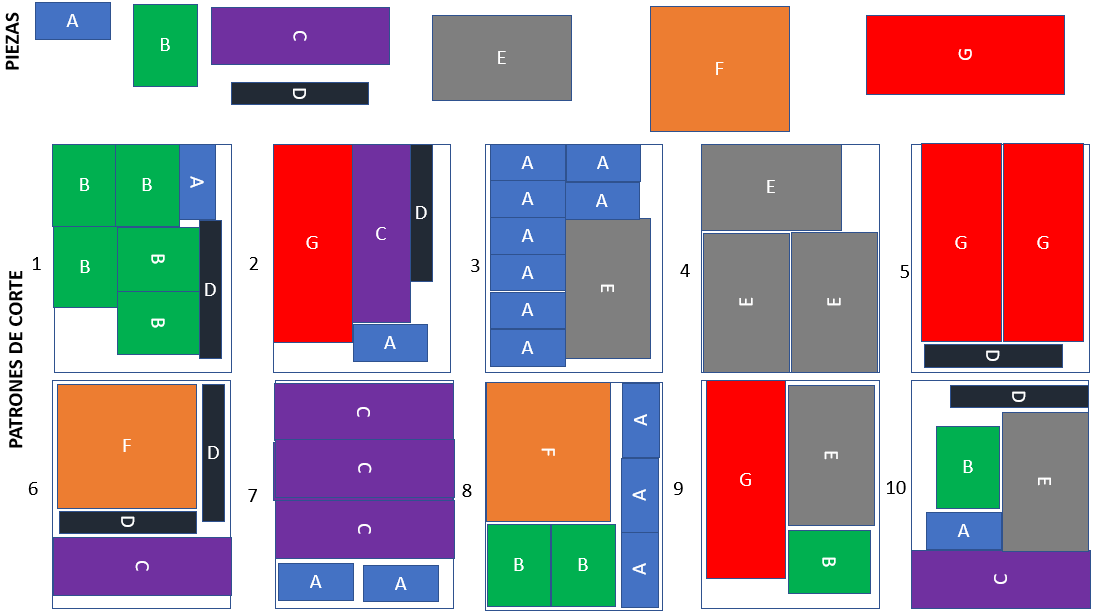

#Proceso de modelación


Formule un modelo de optimización que les permita encontrar a Liliana y Eduardo el número mínimo de láminas a cortar para satisfacer los requerimientos de material de la próxima semana.

Para ello seguiremos los 5 pasos del proceso de modelación:

1.   Definición de elementos y notación
2.   Verbalización
3.   Formulación del modelo descrito en la verbalización del paso 2, usando la notación y elementos definidos en el paso 1
4. Solución con software de optimización, en este caso  Pyomo
5. Interpretación de la solución  

#1 Notación y formulación

Para formular este modelo iniciamos definiendo la notación necesaria:

**Conjuntos**

> Piezas: P={A, B, C, D, E,F,G}

> Patrones de corte: C={1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

**Parámetros**
> $r_{i}$: Requerimiento de la pieza  $i \in P$   [Unidades]

> $pc_{ij}$: Número de piezas $i \in P$ que se obtienen al cortar una lámina con el patrón $j \in C$  [Unidades]

**Variables de decisión**

> $x_{j}$: Variable entera, cantidad de láminas que se cortarán usando el patrón $j \in C$.


#2 Verbalización

Ahora, expresamos en palabras el modelo que queremos constuir, declarando explícitamente su <font color='blue'>función objetivo</font>,<font color='red'> restricciones</font> y <font color='green'>decisiones</font>:

<font color='green'>Decidir cuántas láminas se deben cortar con cada patrón de corte, </font> <font color='red'> cumpliendo el requerimiento mínimo de cada pieza (demanda) </font> <font color='blue'>, para minimizar el número total de láminas cortadas.</font>


# 3 Formulación

Ahora, usando la notación de 1. y la verbalización de 2., tenemos el siguiente modelo de optimización que permitirá planear óptimamente la asignación de los casos en el bufete de abogados.

>$\text{min}\ LaminasTotales = \sum_{j \in C}x_{j} $    (<font color='blue'> Total de láminas cortadas  </font>)

$sujeto \, a:$

>$\sum_{j \in C}pc_{ij} \, x_{j}\geq r_{i}, \forall i \in P \quad$(<font color='red'> Requerimiento mínimo de cada pieza (demanda)  </font>)

> $x_{j} \in  \mathbb Z^+ \quad \quad \quad \quad \forall j \in C   \quad \quad$           (<font color='green'>Dominio de las variables - enteras- </font>)



# Modelo concreto Pyomo

Esta vez optaremos por un modelo concreto de Python, $\texttt{ConcreteModel}$, en el cual se inicializan los componentes del modelo conforme se van agregando, a diferencia de los modelos abstractos que se inicializan al crear una instancia con un conjunto de datos específico. En este caso, los datos estarán cargados antes de construir el modelo a traves de las funcionalidades que nos provee Python para leer archivos (p.ej. de hoja de cálculo) a traves del paquete [Pandas](https://pandas.pydata.org/). Para más detalles sobre los modelos concretos y abstractos  y sus diferencias, recomendamos el capítulo correspondiente a modelos concretos del libro de Pyomo (Bynum et al, 2021)   

# 4 Implementación computacional

Primero es necesario instalar Pyomo para tener acceso al modelador algebraico, y como optimizador usaremos esta vez [cbc](https://github.com/coin-or/Cbc) de [COIN-OR](https://www.coin-or.org/).

Usaremos Pandas para poder tener acceso a los datos antes de crear el modelo

>Pandas

$\texttt{import pandas as pd}$



In [ ]:
# install pyomo and import libraries
!pip install -q pyomo
from pyomo.environ import *
from pyomo.opt import *

## instal cbc
!apt-get install -y -qq coinor-cbc
# Set the solver
solver = solvers.SolverFactory('cbc', executable='/usr/bin/cbc')


#Acceso a pandas
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 2.6 MB/s eta 0:00:00
Selecting previously unselected package coinor-libcoinutils3v5.
(Reading database ... 128275 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.11.4+repack1-1_amd64.deb ...
Unpacking coinor-libcoinutils3v5 (2.11.4+repack1-1) ...
Selecting previously unselected package coinor-libosi1v5.
Preparing to unpack .../1-coinor-libosi1v5_0.108.6+repack1-1_amd64.deb ...
Unpacking coinor-libosi1v5 (0.108.6+repack1-1) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.17.5+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.17.5+repack1-1) ...
Selecting previously unselected package coinor-libcgl1.
Preparing to unpack .../3-coinor-libcgl1_0.60.3+repack1-2_amd64.deb ...
Unpacking coinor-libcgl1 (0.60.3+repack1-2) ...
Selecting previously unselecte

# Lectura de datos

Ahora, usando Pandas y el archivo de datos en Excel $\texttt{Corte.xlsx}$ (disponible en el material del curso) cargaremos los datos para crear un modelo concreto a partir de estos.

Para elegir y subir el archivo, y así cargarlo en el espacio de almacenamiento de sesión del Notebook, usaremos la opción $\texttt{files.upload()}$



In [ ]:
from google.colab import files

files.upload()


Saving Corte.xlsx to Corte.xlsx


{'Corte.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00\x12\x18\xde\xddd\x01\x00\x00\x18\x05\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

#Archivo $\texttt{Corte.xlsx}$

Este archivo tienen dos hojas , la hoja PatronesCorte se ve así:

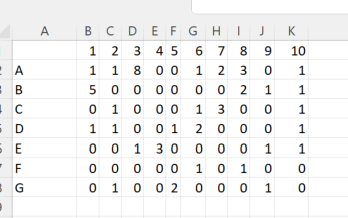

Y la hoja Piezas que tiene la información de las demandas se ve así:

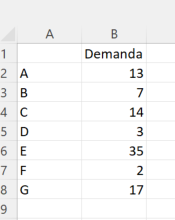



# Implementación con un modelo de optimización concreto


**LECTURA DE DATOS CON PANDAS**

Haciendo uso de Pandas creamos dos dataframes a partir de las hojas de cálculo del archivo que acabamos de leer: uno para los requerimientos de cada pieza $\texttt{dfPiezas}$ y otro para la cantidad de piezas de cada tipo que se obtienen al cortar cada patron de corte  $\texttt{dfPatrones}$. Además usaremos los índices y las columnas para especificar los conjuntos de piezas y patrones de corte.

>Datos de demanda de piezas

$\texttt{dfPiezas=pd.read_excel('Corte.xlsx','Piezas',header=0,index_col=0)}$

>Datos de los patrones de corte


$\texttt{dfPatrones=pd.read_excel('Corte.xlsx','PatronesCorte',header=0,index_col=0)}$


**DEFINICIÓN DE LOS ELEMENTOS DEL MODELO**


Primero declaramos (computacionalmente) los elementos del modelo de optimización, de manera similar a como lo hicimos cuando definimos (matemáticamente) los elementos del modelo de optimización y su notación, haciendo uso de la información que cargamos desde la hoja de cálculo.


Para ello iniciamos con la creación del modelo con la instrucción: $\texttt{model = ConcreteModel(name='cut')}$.  Y luego creamos los conjuntos y los parámetros a partir de los dataframe de Pandas que leímos para los datos de piezas y patrones de corte. Por último creamos las variables de decisión.

>Conjuntos

**Piezas**

$\texttt{Piezas=list(dfPiezas.index.map(str))}$

**Patrones de corte**


$\texttt{Patrones=list(dfPatrones.columns.map(str))}$


>Parámetros (leidos desde los dataframes correspondientes))

**Requerimientos de cada pieza: $ r_i$**

$\texttt{r={i: dfPiezas.at[i,'Demanda'] for i in Piezas}}$

**Cantidad de piezas por patrón: $pc_{ij} $**

$\texttt{pc={(i,j):dfPatrones.at[i,j] for i in Piezas for j in Patrones}}$



>Variables de decisión (Entera: PositiveIntegers)

$\texttt{model.x = Var(Patrones, within=PositiveIntegers)}$


In [ ]:
#Lectura de datos con Pandas
dfPiezas=pd.read_excel('Corte.xlsx','Piezas',header=0,index_col=0)
dfPatrones=pd.read_excel('Corte.xlsx','PatronesCorte',header=0,index_col=0)

# Crear el modelo abstracto
model = ConcreteModel(name='cut')
#Notación
# Conjuntos: Piezas
Piezas=list(dfPiezas.index.map(str))
#Patrones
Patrones=list(dfPatrones.columns.map(int))

#Parametros
#Requerimiento de cada pieza
r={i: dfPiezas.at[i,'Demanda'] for i in Piezas}
#Cantidad producida de cada pieza por cada patron decorte
pc={(i,j):dfPatrones.at[i,j] for i in Piezas for j in Patrones}
# Definir variables
model.x = Var(Patrones, bounds=(0.0 , None), within=Integers)




**FORMULACIÓN DEL MODELO CONCRETO**

Ahora que ya tenemos los elementos del modelo definimos la función objetivo y las restricciones:

>Función objetivo: total de láminas cortadas:

$\texttt{def totlam_rule(model):}$

$\quad\texttt{ return sum(model.x[j] for j in Patrones)}$

$\texttt{model.lam_total = Objective(sense=minimize, rule=totlam_rule)}$

>Restricciones

*Requerimiento mínimo de cada pieza (demanda)*:

$\texttt{def req_rule(model, i):}$

$\quad\texttt{return sum(pc[i,j]*model.x[j] for j in Patrones) >= r[i]}$

$\texttt{model.req_rule = Constraint(Piezas,rule=req_rule)}$







In [ ]:
print(Piezas)
print(dfPiezas)
print(r)


['A', 'B', 'C', 'D', 'E', 'F', 'G']
   Demanda
A       13
B        7
C       14
D        3
E       35
F        2
G       17
{'A': 13, 'B': 7, 'C': 14, 'D': 3, 'E': 35, 'F': 2, 'G': 17}


In [ ]:
# Función objetivo - costo total
def totlam_rule(model):
  return sum(model.x[j] for j in Patrones)
model.lam_total = Objective(sense=minimize, rule=totlam_rule)

# Restriccion de requerimiento de las piezas
def req_rule(model, i):
  return sum(pc[i,j]*model.x[j] for j in Patrones) >= r[i]
model.req_rule = Constraint(Piezas,rule=req_rule)


# Solución

Una vez creado el modelo se le pasa al optimizador para que resuelva el problema:

>($\texttt{solver.solve(model)}$)

#Impresión del modelo en formato .lp

A manera de verificación exportamos el modelo en un archivo en el formato .lp ,el cual es un formato  "natural" que permite ver el resultado de la construcción del modelo  y también exportarlo para que sea resuelto por otros optimizadores o incluso cargarlo directamente en NEOS.   Si se abre este archivo  se verá cómo el archvo .lp corresponde a la formulación detallada del modelo que acbamos de construir

> $\texttt{model.write('cuttest',format='lp')}$




In [ ]:
# resuleve el modelo concreto

solver.solve(model)

#Exporta el archivo .lp

model.write('cuttest',format='lp')




('cuttest', 140363900574976)

 # 5 Interpretación de la solución

Finalmente, después de haber  resuelto la problema de optimización,  recuperamos los resultados de las variables de decisión y la función objetivo óptima.

 >Impresión de resultados

Para visualizar los resultados usaremos la función $\texttt{value()}$ sobre la función objetivo y las variables del modelo$:





In [ ]:
#Impresion de resultados
print("La solución optima corta  " + str(value(model.lam_total)) + " laminas en total")
for j in Patrones:
    if(value(model.x[j]>0)):
      print("Se cortan " + str(value(model.x[j])) + " laminas del patron " + str(j))

La solución optima corta  28.0 laminas en total
Se cortan 10.0 laminas del patron 4
Se cortan 7.0 laminas del patron 5
Se cortan 4.0 laminas del patron 7
Se cortan 2.0 laminas del patron 8
Se cortan 3.0 laminas del patron 9
Se cortan 2.0 laminas del patron 10


# Referencia bibliográfica

Bynum, M. L., Hackebeil, G. A., Hart, W. E., Laird, C. D., Nicholson, B. L., Siirola, J. D., Waston J.P & Woodruff, D. L. (2021). *Pyomo-optimization modeling in Python* (Vol. 67). Springer.  https://link.springer.com/content/pdf/10.1007/978-3-030-68928-5.pdf






